In [3]:
from multi_path_base import *
#%matplotlib tk 
forecast_with_data=np.load('forecast_with_data.npy')

In [18]:
interpolation_points=100
x = np.arange(1,72+1,1)

y = forecast_with_data[80,:,1] #X[j,:]
tck = interpolate.splrep(x, y, s=0)

xnew=np.linspace(1,72,interpolation_points)
p_inter = interpolate.splev(xnew, tck, der=0)
p=p_inter

N=len(p_inter)
dt=1
M_test=2000
#real_1 = real(0.15878588, 1.40043092) 
real_1 = real(0.5, 0.3) 
#real_1 = real(1e-1,1e-5) 


disct_temp = disct(N,dt,M_test)

In [ ]:
%%capture
normal_X_derivative_tracking_Euler = np.empty((M_test,len(p_inter)));
normal_X_derivative_tracking_Euler= gen_X_normal_euler_derivative_tracking(X0=p_inter[0], disct=disct_temp,real=real_1, forecast=p_inter );


In [ ]:
#plt.plot(X[0,:])
fig = plt.figure(0)
fig.clf()

plt.xlim(0, 72)
plt.ylim(0, 1)
for j in range(0,M_test):
    plt.plot(xnew,normal_X_derivative_tracking_Euler[j,:], 'k-')
plt.plot(xnew,normal_X_derivative_tracking_Euler[j,:], 'k-', label='simulated forecast')
plt.plot(xnew,p, 'r-', label='forecast')
plt.title('Simulated X paths using adaptive $\\Delta t$ ',fontsize=24)
plt.xlabel('Time [hr]')
plt.ylabel('Power')
plt.legend()

In [ ]:
V=normal_X_derivative_tracking_Euler - p
fig = plt.figure(1)
fig.clf()
for i in range(0,M_test):
    plt.plot(V[i,:])

In [ ]:
this_model=model_beta_flex(disct_temp,V, forecast=p )

In [ ]:
this_model.optimize()

In [19]:
beta_V=gen_path_beta_robust(X0=0, disct=disct_temp,real=real_1, forecast=p_inter );

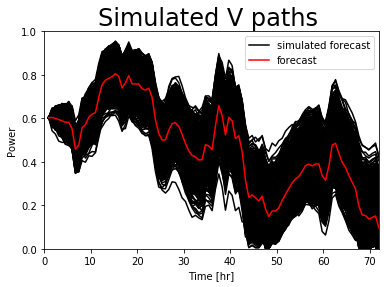

In [20]:
#plt.plot(X[0,:])
fig = plt.figure(0)
fig.clf()

plt.xlim(0, 72)
plt.ylim(0, 1)
for j in range(0,M_test):
    plt.plot(xnew,beta_V[j,:]+p, 'k-')
plt.plot(xnew,beta_V[j,:]+p, 'k-', label='simulated forecast')
plt.plot(xnew,p, 'r-', label='forecast')
plt.title('Simulated V paths ',fontsize=24)
plt.xlabel('Time [hr]')
plt.ylabel('Power')
plt.legend()


In [21]:
second_model=model_beta_flex(disct_temp,beta_V, forecast=p )

In [22]:
second_model.optimize()

(array([2.19121063, 0.06979446]),
 b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH')

In [23]:
second_model.get_error(real_1)

(3.3824212668575075, 0.7673518080908375)

2.77283304